In this example, we're using a simple Artificial Neural Network to predict the labels of the images.
For example, if the image contains the digit 5, the neural network should output 5.

In [1]:
# torch comes from PyTorch, the most widely used deep learning library
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# torchvision is a library that contains many datasets and helper functions for image processing
import torchvision

# other imports that we need
import struct
import random
import numpy as np
from array import array
from os.path  import join
import matplotlib.pyplot as plt

# magic to show plots in the jupyter notebook
%matplotlib inline

# helper function to plot the data, which are images
def show_images(images, titles):
    cols = 5
    rows = len(images)//cols + 1
    plt.figure(figsize=(20,12))
    index = 0    
    for (image, title) in zip(images, titles):
        plt.subplot(rows, cols, index+1)        
        plt.imshow(image, cmap=plt.cm.gray)
        plt.title(title, fontsize = 8);        
        index += 1
    plt.show()
    plt.close()

# we don't need a GPU for this example, but as soon as we're dealing with bigger networks and larger data, we don't come around using a GPU
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

# how many images are trained at once
batch_size = 32

# we're using MNIST, a dataset of handwritten digits. PyTorch has a helper function to download and prepare this dataset
train_dataset = torchvision.datasets.MNIST(root='data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='data', train=False, transform=torchvision.transforms.ToTensor(), download=True)

# we're using a data loader to load the images in batches of 32 during the training
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

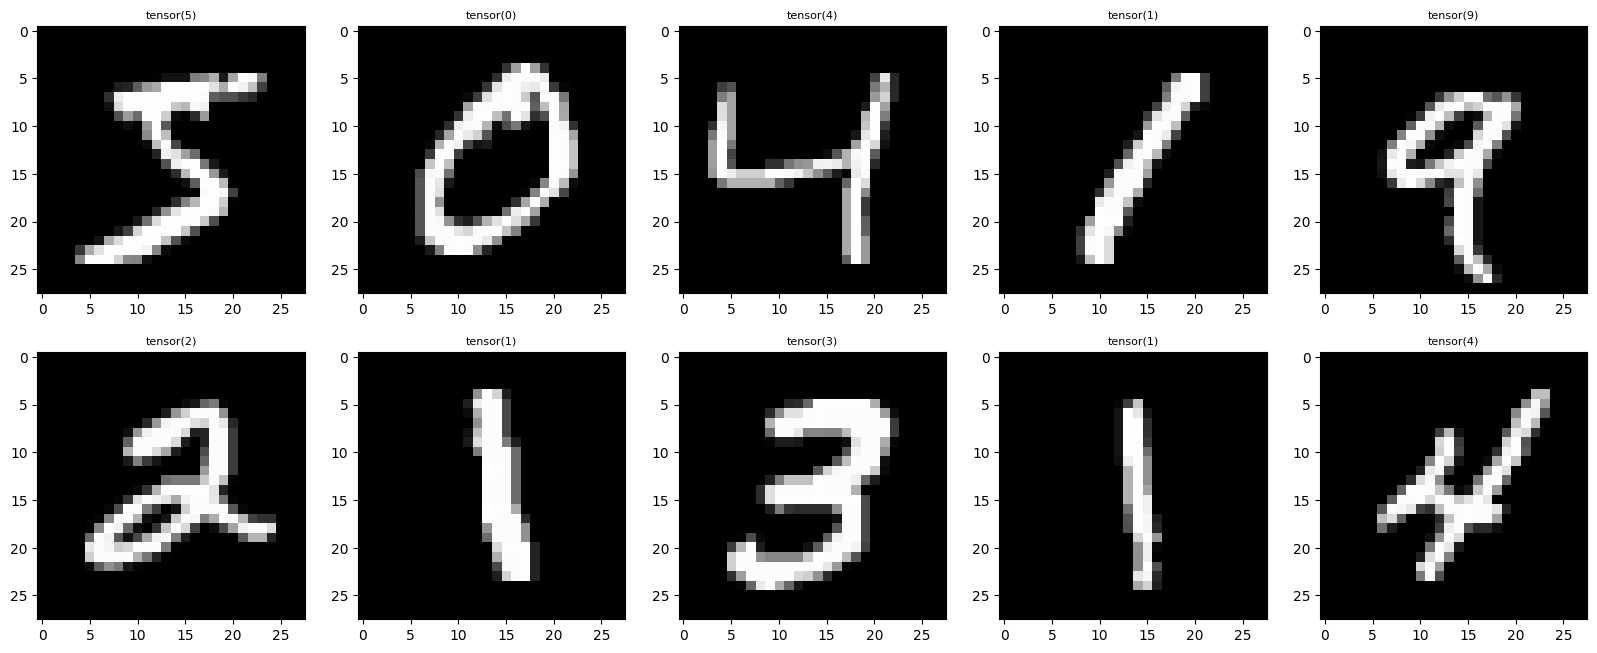

In [2]:
imgs_train = [train_dataset.data[i] for i in range(10)]
labels_train = train_dataset.targets[:10]

show_images(imgs_train, labels_train)

In [3]:
# we define a simple neural network architecture and tell it how to process the data in the forward function
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # we need to specify the correct dimensions, otherwise it won't work
        self.fc0 = nn.Linear(784, 128)
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # the image is 28x28 pixels, but we need a 1D vector as input for the neural network
        x = torch.flatten(x, 1)
        # we use a ReLU activation function, which is a common choice for hidden layers
        x = torch.relu(self.fc0(x))
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc1(x))
        # softmax outputs a probability distribution over the 10 classes, e.g. 5% chance of being a 0, 10% chance of being a 1, etc.
        x = self.softmax(self.fc2(x))
        return x

# we make an instance of the network and move it to the specified device
net = Net()
net.to(device)

# we define the loss function, which in this case measures how far the network's probability distribution is from the real one.
criterion = nn.CrossEntropyLoss()
# we use the Adam optimizer, which is a popular choice for training neural networks
optimizer = optim.AdamW(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

In [4]:

# we train the network for 10 epochs, which means we train the network 10x on the whole training dataset
for epoch in range(10):

    # this is just used for printing statistics for our convenience
    running_loss = 0.0
    # we iterate through the whole dataset, in batches of 32 samples
    for i, data in enumerate(trainloader, 0):

        # get the images as inputs and the labels
        inputs, labels = data

        # move the data to the device (GPU or CPU)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # we make a probability distribution out of the label,
        # which just means the label will have 100% probability and all other classes 0% probability
        # we do this because the loss function expects a probability distribution as input
        # and the neural network outputs a probability distribution due to our use of the softmax function
        labels_oh = torch.nn.functional.one_hot(labels, 10)

        # the optimizer needs to be reset before each training step
        optimizer.zero_grad()

        # we make a forward pass of the neural network
        predicted = net(inputs)

        # we compute the loss
        loss = criterion(predicted, labels_oh.float())

        # we make a backward pass of the neural network,
        # meaning we compute the gradients of the loss with respect to the weights
        loss.backward()

        # we update the weights of the neural network, meaning that each weight in the
        # neural network is updated so that the loss is reduced in the next iteration (hopefully)
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

# we save the neural network weights to a file
PATH = './models/handwritten_digit_recognition_net.pth'
torch.save(net.state_dict(), PATH)

print('Finished Training')

[1,   100] loss: 2.002
[1,   200] loss: 1.687
[1,   300] loss: 1.616
[1,   400] loss: 1.601
[1,   500] loss: 1.573
[1,   600] loss: 1.568
[1,   700] loss: 1.571
[1,   800] loss: 1.562
[1,   900] loss: 1.555
[1,  1000] loss: 1.554
[1,  1100] loss: 1.544
[1,  1200] loss: 1.549
[1,  1300] loss: 1.533
[1,  1400] loss: 1.543
[1,  1500] loss: 1.535
[1,  1600] loss: 1.537
[1,  1700] loss: 1.532
[1,  1800] loss: 1.533
[2,   100] loss: 1.526
[2,   200] loss: 1.524
[2,   300] loss: 1.522
[2,   400] loss: 1.526
[2,   500] loss: 1.518
[2,   600] loss: 1.530
[2,   700] loss: 1.527
[2,   800] loss: 1.518
[2,   900] loss: 1.528
[2,  1000] loss: 1.514
[2,  1100] loss: 1.518
[2,  1200] loss: 1.513
[2,  1300] loss: 1.518
[2,  1400] loss: 1.518
[2,  1500] loss: 1.519
[2,  1600] loss: 1.517
[2,  1700] loss: 1.509
[2,  1800] loss: 1.517
[3,   100] loss: 1.509
[3,   200] loss: 1.503
[3,   300] loss: 1.503
[3,   400] loss: 1.509
[3,   500] loss: 1.505
[3,   600] loss: 1.510
[3,   700] loss: 1.511
[3,   800] 

Accuracy: 96 %


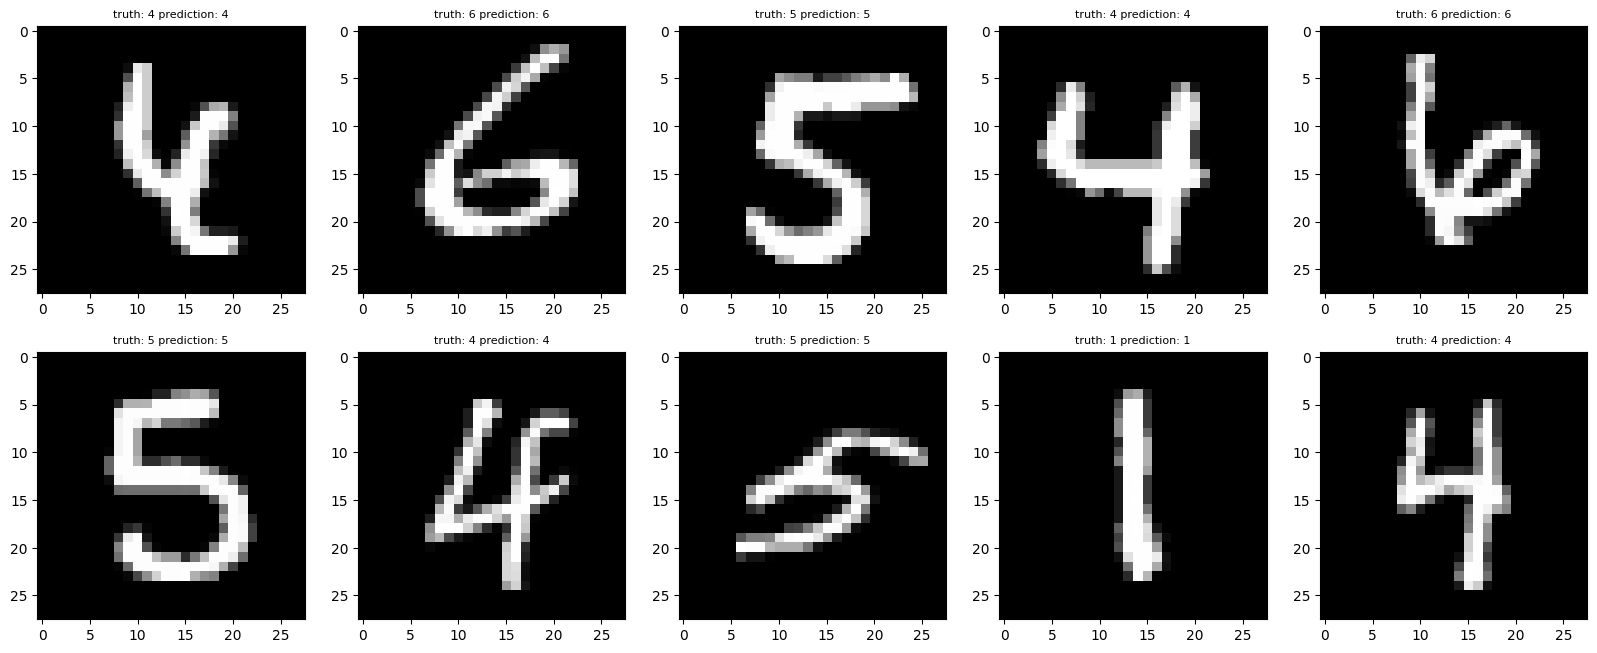

In [5]:
# we reload the neural network weights from the file
net = Net()
net.load_state_dict(torch.load(PATH))
net.to(device)
net.eval()

correct = 0
total = 0

inputs_qualitative = []
labels_qualitative = []

# we iterate through the test dataset
for i, data in enumerate(testloader, 0):

        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # we choose a few images to visualize later
        if i == 5:
            inputs_qualitative = inputs
            labels_qualitative = labels

        # we make a forward pass of the neural network
        predicted = net(inputs)

        # we get the class label with the highest probability
        predicted = torch.argmax(predicted, dim=1)

        # we add the number of correct predictions in this batch
        correct += (predicted == labels).sum().item()

        # we add the number of total predictions in this batch
        total += labels.size(0)

# we print the overall accuracy as measured on the test set,
# so we can see how well the network performs
print('Accuracy: %d %%' % (100 * correct / total))

# do a last forward pass and get the class label with the highest probability
predicted_qualitative = net(inputs_qualitative)
predicted_qualitative = torch.argmax(predicted_qualitative, dim=1)

# we visualize the images and the predicted labels
imgs_qualitative = [inputs_qualitative[i].squeeze(0).cpu() for i in range(10)]
labels_qualitative = ['truth: ' + str(labels_qualitative[i].item()) + ' prediction: ' + str(predicted_qualitative[i].item()) for i in range(10)]

show_images(imgs_qualitative, labels_qualitative)